In [29]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [54]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)

In [55]:
print(Measurement)

<class 'sqlalchemy.ext.automap.measurement'>


In [90]:
#  3. Convert the June temperatures to a list.
results =[]
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [101]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Temperature'])

In [102]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temperature
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [93]:
df.skew()

Temperature   -0.226076
dtype: float64

Text(0.5, 1.0, 'June')

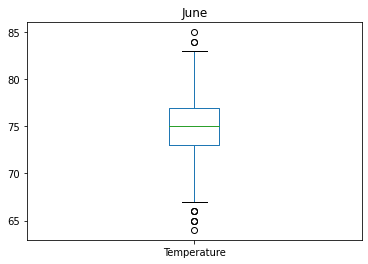

In [84]:
df.plot.box()
plt.ylabel("")
plt.title("June")

In [122]:
#  3. Convert the June temperatures to a list.
results =[]
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
df = pd.DataFrame(results, columns=['date','Preciptitation'])
df.describe()

,Preciptitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


Text(0.5, 1.0, 'June')

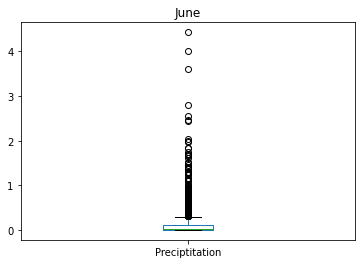

In [123]:
df.plot.box()
plt.ylabel("")
plt.title("June")

In [124]:
df.skew()

Preciptitation    5.674368
dtype: float64

In [125]:
#  3. Convert the June temperatures to a list.
results =[]
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
df = pd.DataFrame(results, columns=['date','Precipitation'])
df.describe()

,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0.5, 1.0, 'December')

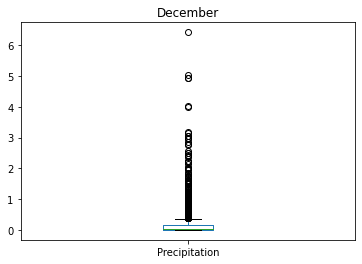

In [126]:
df.plot.box()
plt.ylabel("")
plt.title("December")

In [127]:
df.skew()

Precipitation    4.961724
dtype: float64

## D2: Determine the Summary Statistics for December

In [60]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [111]:
# 7. Convert the December temperatures to a list.
results =[]
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [112]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df2 = pd.DataFrame(results, columns=['date','Temperature'])

In [113]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df2.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 1.0, 'December')

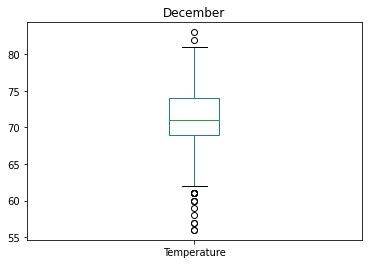

In [114]:
df2.plot.box()
plt.ylabel("")
plt.title("December")

In [115]:
df2.skew()

Temperature   -0.405498
dtype: float64

In [99]:
#cdf = [df, df2]

In [66]:
cdf = [pd.concat([df, df2])]
mdf = pd.melt(cdf, id_vars=['date'], var_name=['Letter'])

AttributeError: 'list' object has no attribute 'columns'

In [67]:
cdf.plot.box()

AttributeError: 'list' object has no attribute 'plot'

In [68]:
%matplotlib inline
#convert data frame to array for plotting
plot_array = cdf.iloc[:,1:9].values
plt.boxplot(plot_array)

AttributeError: 'list' object has no attribute 'iloc'